In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
plt.style.use("ggplot")

In [23]:
df = pd.read_csv("./datasets/pizza_delivery.csv")

In [24]:
df.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
0,Thursday,01-May-14,35.128367,Laura,East,Bruno,68.287716,58.4,4,0,0,1
1,Thursday,01-May-14,25.203074,Melissa,East,Salvatore,70.997791,26.4,2,0,0,0
2,Thursday,01-May-14,45.643404,Melissa,West,Salvatore,53.394145,58.1,3,1,0,0
3,Thursday,01-May-14,29.374298,Melissa,East,Salvatore,70.306596,35.2,3,0,0,0
4,Thursday,01-May-14,29.994610,Melissa,West,Salvatore,71.501688,38.4,2,0,0,0


<Axes: xlabel='time', ylabel='temperature'>

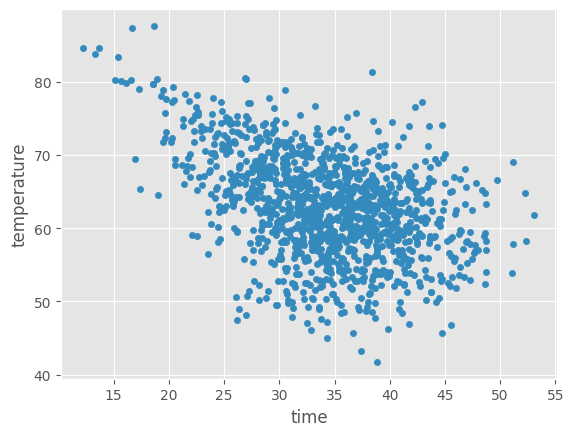

In [25]:
df.plot.scatter('time', "temperature")

In [26]:
group = df.groupby("driver")

In [27]:
df.driver.unique()

array(['Bruno', 'Salvatore', 'Mario', 'Luigi', 'Domenico'], dtype=object)

In [28]:
Bruno_data = group.get_group("Bruno")
Salvatore_data = group.get_group("Salvatore")
Mario_data = group.get_group("Mario")
Luigi_data = group.get_group("Luigi")
Domenico_data = group.get_group("Domenico")

<Axes: xlabel='time', ylabel='temperature'>

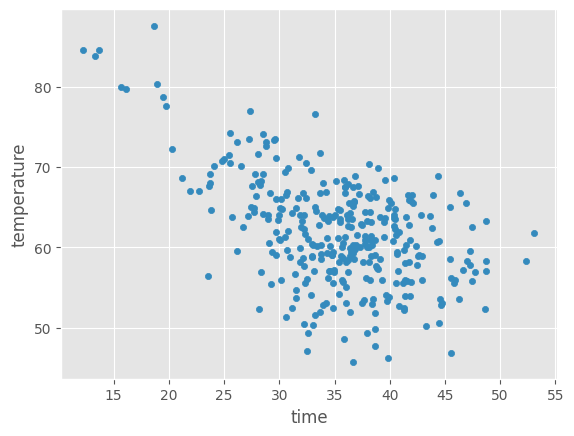

In [29]:
Bruno_data.plot.scatter("time", "temperature")

<Axes: xlabel='time', ylabel='temperature'>

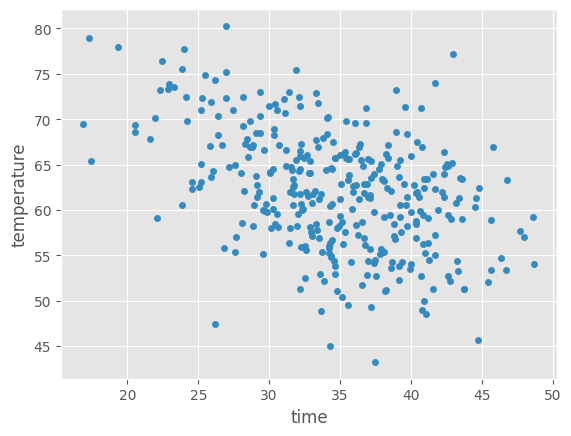

In [30]:
Salvatore_data.plot.scatter("time", "temperature")

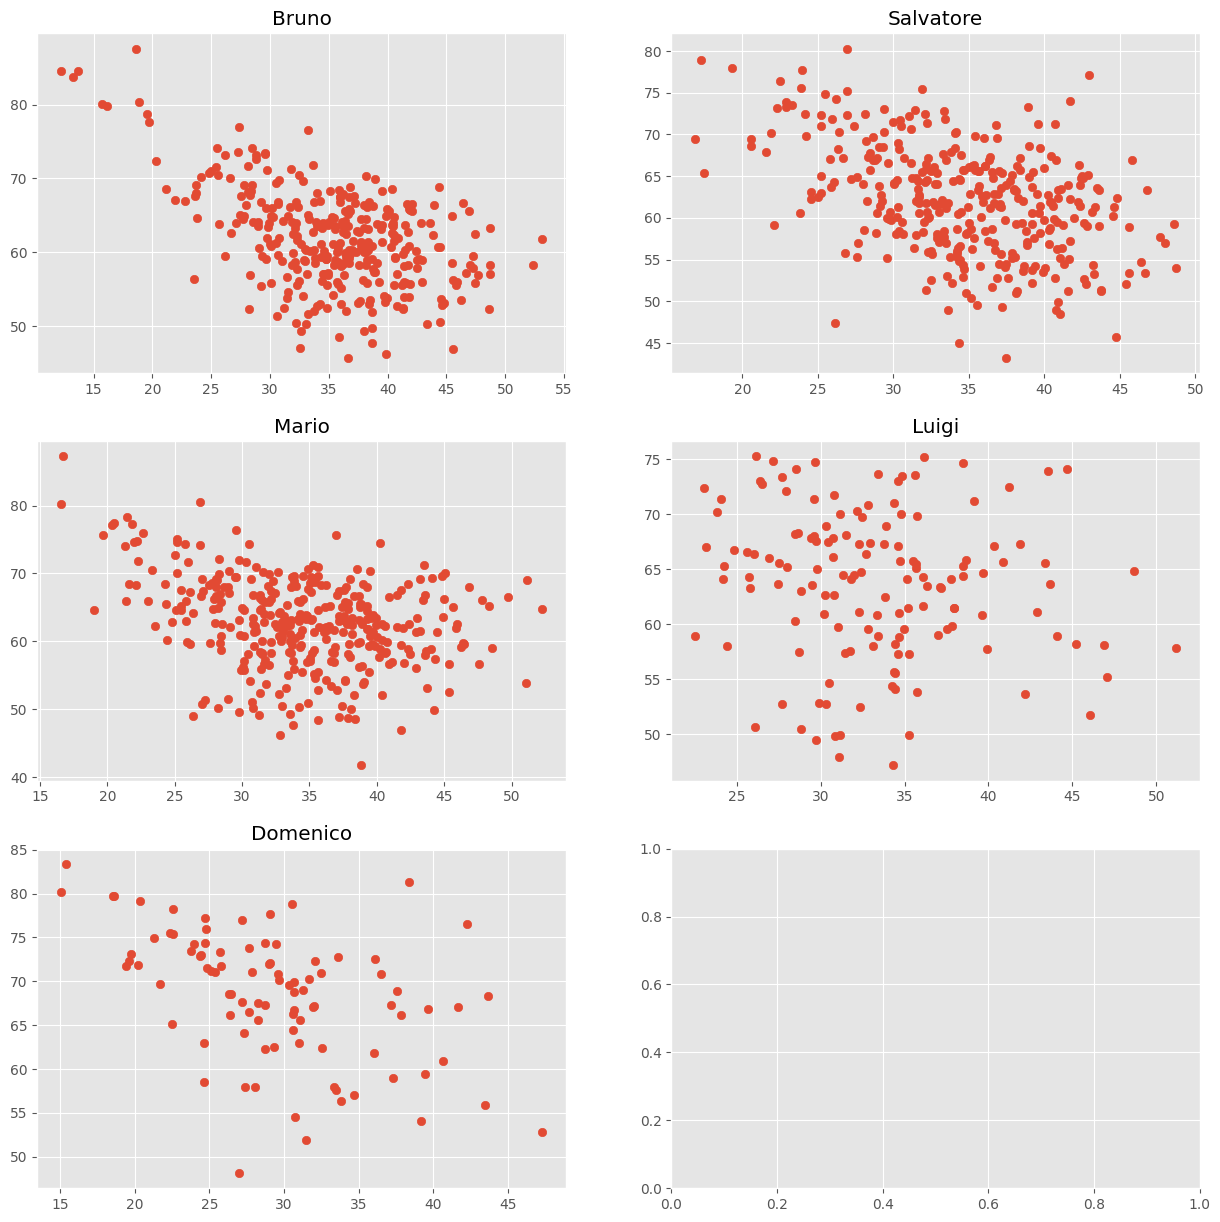

In [31]:
fig, axeses = plt.subplots(figsize=(15,15), ncols=2, nrows=3)

axes1, axes2 = axeses[0]
axes3, axes4 = axeses[1]
axes5, axes6 = axeses[2]


_axeses = [axes1, axes2, axes3, axes4, axes5]
groups = [ group.get_group(driver) for driver in df.driver.unique()]

for _ax,_group,driver in zip(_axeses, groups, df.driver.unique()):
    _ax.scatter(_group.time, _group.temperature)
    _ax.set_title(driver)
    

In [32]:
for driver in df.driver.unique():
    data = group.get_group(driver)
    print(f"{driver:10s}: {data.time.corr(data.temperature):0.2f}")

Bruno     : -0.53
Salvatore : -0.44
Mario     : -0.32
Luigi     : -0.13
Domenico  : -0.49


________________

## Outliers

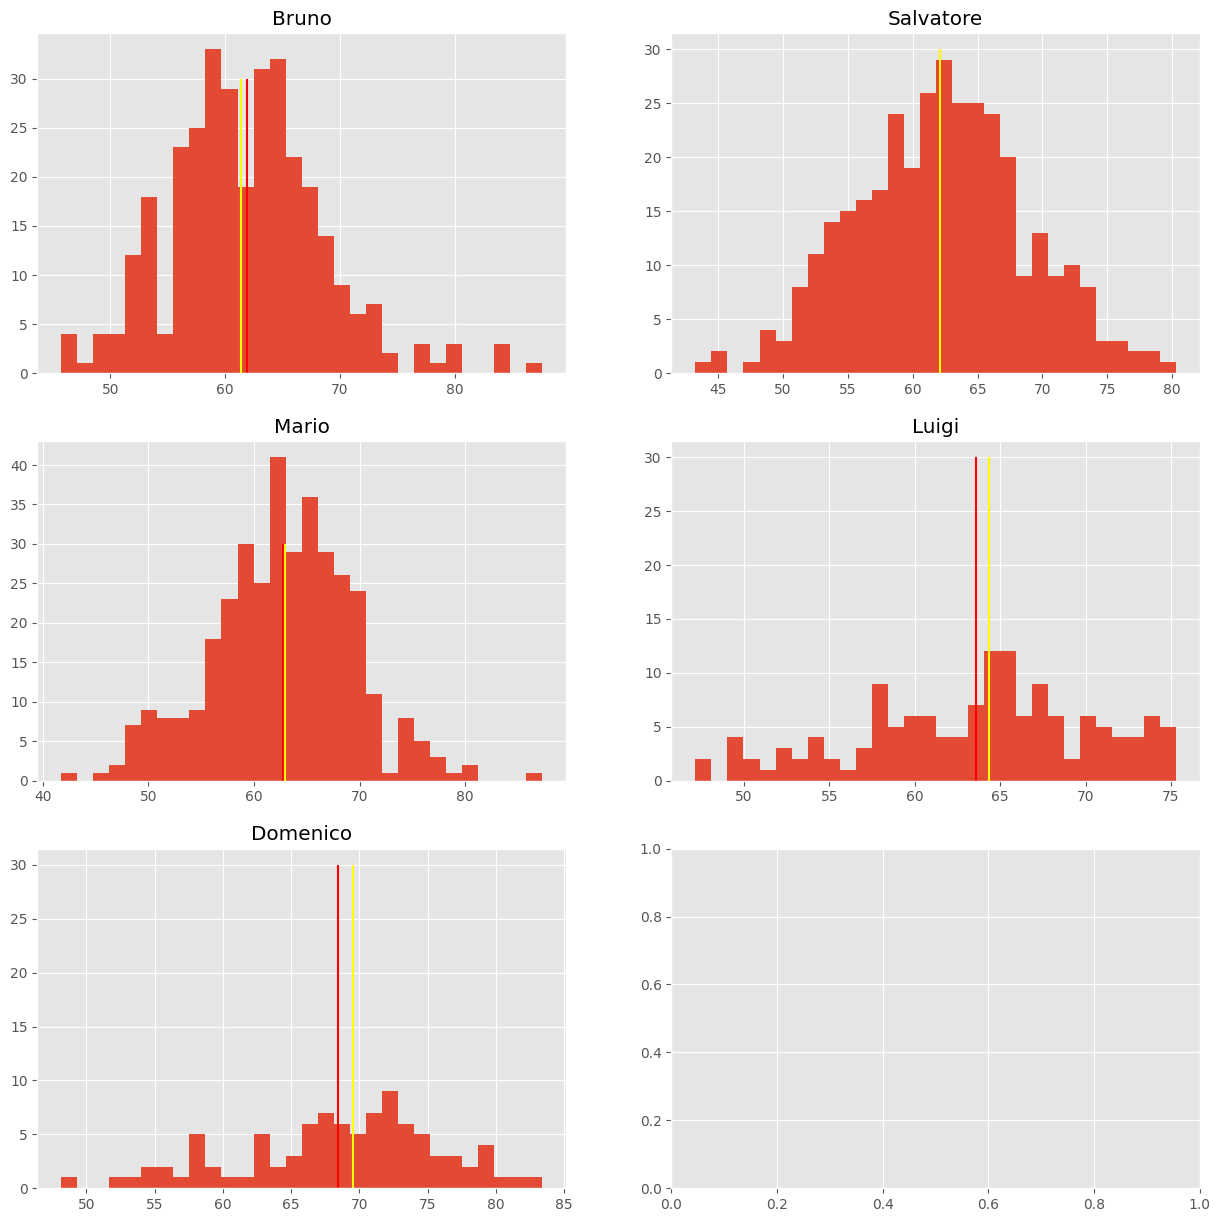

In [33]:
fig, axeses = plt.subplots(figsize=(15,15), ncols=2, nrows=3)

axes1, axes2 = axeses[0]
axes3, axes4 = axeses[1]
axes5, axes6 = axeses[2]


_axeses = [axes1, axes2, axes3, axes4, axes5]
groups = [ group.get_group(driver) for driver in df.driver.unique()]

for _ax,_group,driver in zip(_axeses, groups, df.driver.unique()):
    _ax.hist(_group.temperature, bins=30)
    mean_value = _group.temperature.mean();
    median_value = _group.temperature.median();
    _ax.vlines(mean_value, 0, 30, color="red")
    _ax.vlines(median_value, 0, 30, color="yellow")
    _ax.set_title(driver)
    

In [34]:
for _group,driver in zip(groups, df.driver.unique()):
    print(f"{driver}: {_group.temperature.std():0.2f}")

Bruno: 6.75
Salvatore: 6.57
Mario: 6.65
Luigi: 6.74
Domenico: 7.30


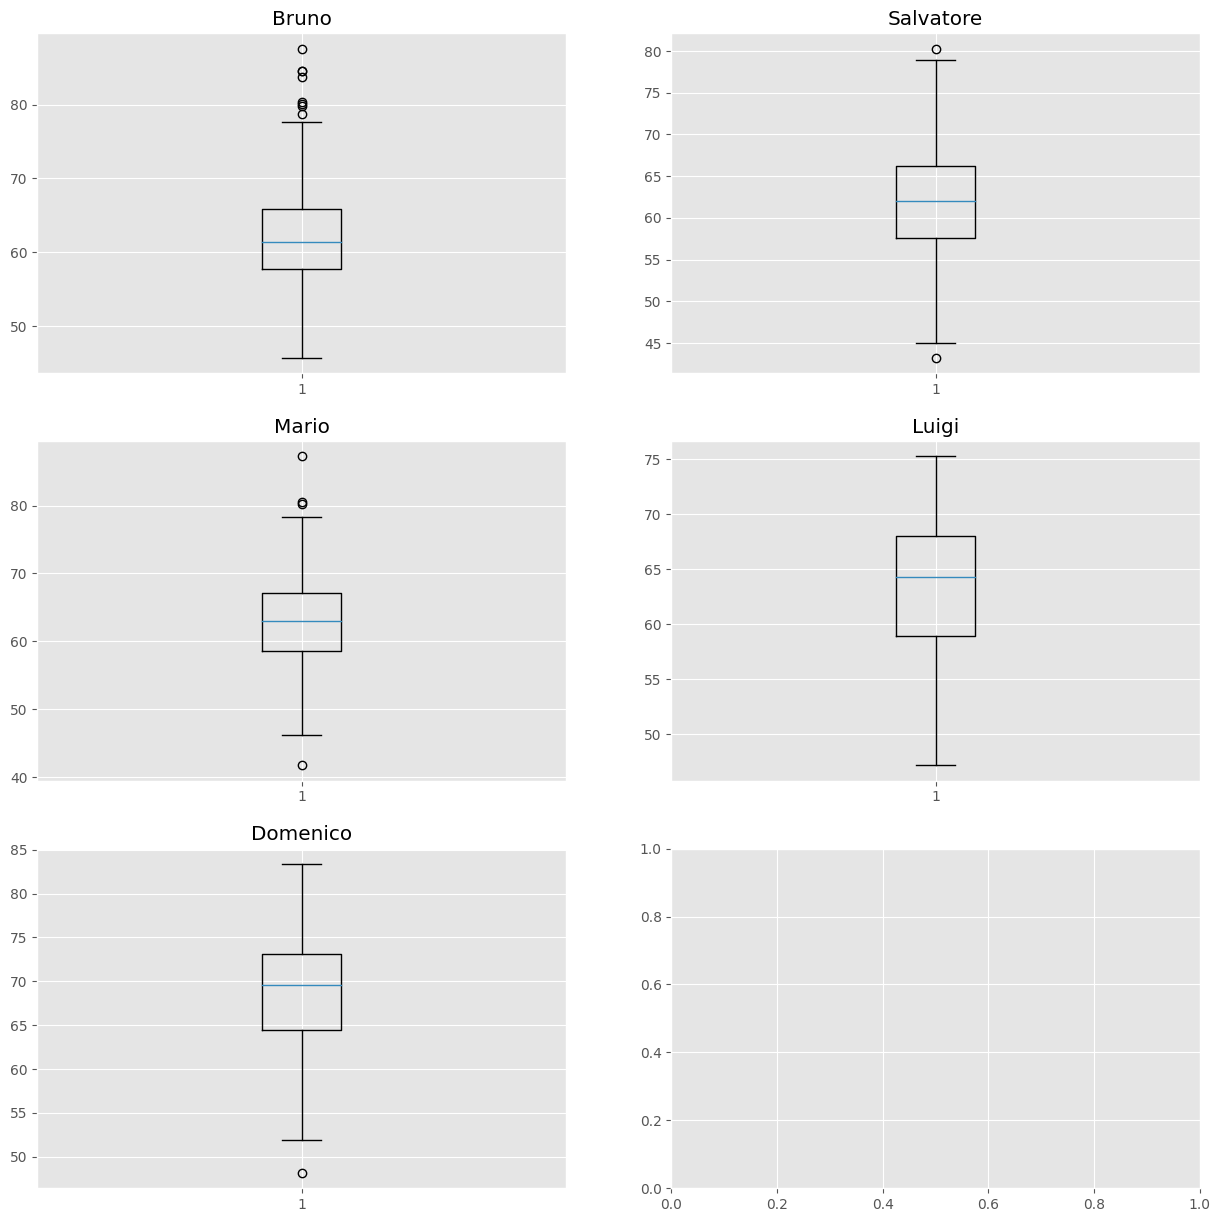

In [35]:
fig, axeses = plt.subplots(figsize=(15,15), ncols=2, nrows=3)

axes1, axes2 = axeses[0]
axes3, axes4 = axeses[1]
axes5, axes6 = axeses[2]


_axeses = [axes1, axes2, axes3, axes4, axes5]
groups = [ group.get_group(driver) for driver in df.driver.unique()]

for _ax,_group,driver in zip(_axeses, groups, df.driver.unique()):
    _ax.boxplot(_group.temperature)
    mean_value = _group.temperature.mean();
    median_value = _group.temperature.median();
    # _ax.vlines(mean_value, 0, 30, color="red")
    # _ax.vlines(median_value, 0, 30, color="yellow")
    _ax.set_title(driver)
    

## Outliers

```
     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
flier             <----------->            fliers
                       IQR
```

In [64]:
def box_parm(Series, offset=1.5):
    Q1 = np.percentile(Series, 25)
    Q2 = np.percentile(Series, 50)
    Q3 = np.percentile(Series, 75)
    
    IQR = Q3-Q1
    left_flier = Q1 - offset*IQR
    right_flier = Q3 + offset*IQR
    
    return {"Q1": Q1, "Q2":Q2, "Q3": Q3, 
           "IQR": IQR, "lflier":left_flier, "rflier":right_flier}

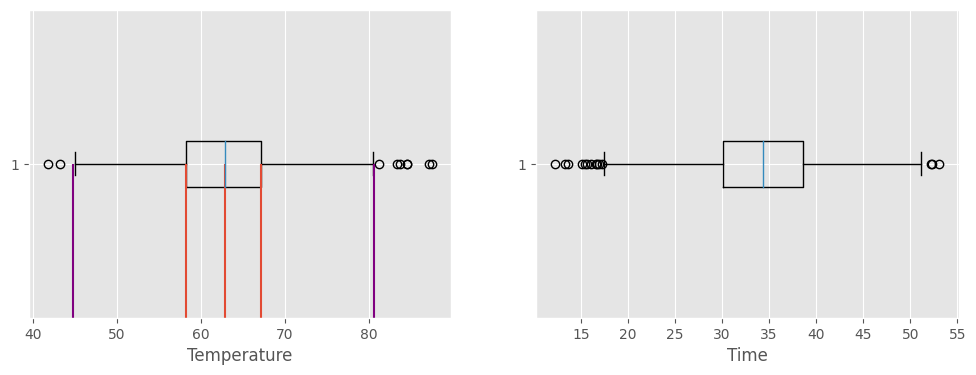

In [67]:
fig, (axes1, axes2) = plt.subplots(figsize=(12, 4),ncols=2)

box_data = box_parm(df.temperature)

axes1.boxplot(df.temperature, vert=False)
axes1.set_xlabel("Temperature")

axes2.boxplot(df.time, vert=False)
axes2.set_xlabel("Time")

axes1.vlines([box_data["Q1"],box_data["Q2"],box_data["Q3"]],0.5, 1)


axes1.vlines([box_data["lflier"],box_data["rflier"]],0.5, 1, color='purple')

axes1.set_ylim(0.5, 1.5)
plt.show()

In [77]:
((df.time < _time["lflier"]) | (df.time > _time["rflier"])).sum()

14

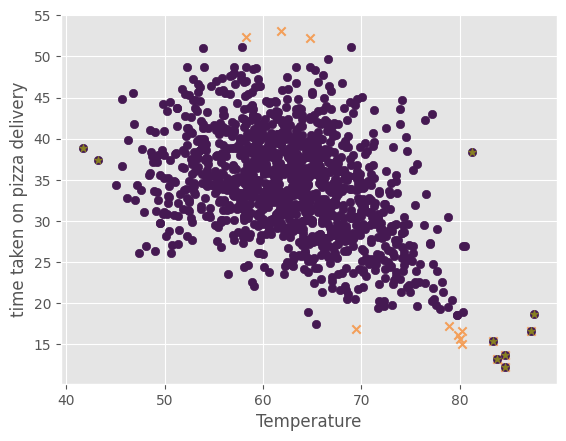

In [98]:
fig, axes = plt.subplots()

_time  = box_parm(df.time)
_temp = box_parm(df.temperature)

_temp_filter = (df.temperature < _temp["lflier"]) | (df.temperature > _temp["rflier"])
_time_filter = (df.time < _time["lflier"]) | (df.time > _time["rflier"])
_time_ifilter = ~_time_filter
_temp_ifilter = ~_temp_filter

axes.scatter(df[_time_filter].temperature, df[_time_filter].time, color="#F39F5A", marker='x')

axes.scatter(df[_time_ifilter | _temp_filter].temperature, df[_time_ifilter | _temp_filter].time, color="#451952")
axes.scatter(df[_temp_filter].temperature, df[_temp_filter].time, color="#898121", marker='*')

axes.set_ylabel("time taken on pizza delivery")
axes.set_xlabel("Temperature")
plt.show()

In [89]:
_time_filter | _temp_filter

0       False
1       False
2       False
3       False
4       False
        ...  
1261    False
1262    False
1263    False
1264    False
1265    False
Length: 1266, dtype: bool

In [88]:
_temp_filter

0       False
1       False
2       False
3       False
4       False
        ...  
1261    False
1262    False
1263    False
1264    False
1265    False
Name: temperature, Length: 1266, dtype: bool